## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional  as F
from scipy.signal import convolve2d

In [5]:
# for getting summary info on models
from torchsummary import summary

In [6]:
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

In [7]:
import copy
import torchvision

## 2. Get the data

In [8]:
emnist= pd.read_csv("emnist-letters-train.csv")

In [9]:
emnist.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# emnist["23"].value_counts().sort_index()

In [11]:
emnist.rename(columns={'23' : "label"},inplace=True)

In [12]:
emnist.columns

Index(['label', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.406', '0.407', '0.408', '0.409', '0.410', '0.411', '0.412', '0.413',
       '0.414', '0.415'],
      dtype='object', length=785)

### Changing the classes

In [13]:
# from 0 to 25

emnist["label"] = emnist["label"]-1

In [14]:
emnist["label"].value_counts()

24    3453
10    3438
4     3437
23    3437
19    3436
16    3435
15    3430
8     3428
25    3427
7     3424
21    3422
22    3422
20    3419
2     3419
17    3419
11    3415
14    3408
9     3402
12    3402
3     3398
1     3396
0     3396
5     3394
18    3392
6     3385
13    3365
Name: label, dtype: int64

In [15]:
col = []
for i in range(0,785):
    
    col.append(str(i))

In [16]:
col

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [17]:
col_old = emnist.columns[1:]

In [18]:
col_old

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.406', '0.407', '0.408', '0.409', '0.410', '0.411', '0.412', '0.413',
       '0.414', '0.415'],
      dtype='object', length=784)

In [19]:
# zipped = zip(col_old,col)

In [20]:
col_dic = {}
for o,n in list(zip(col_old,col)):
    
#     print(o,n)
    col_dic[o] =n

In [21]:
col_dic

{'0': '0',
 '0.1': '1',
 '0.2': '2',
 '0.3': '3',
 '0.4': '4',
 '0.5': '5',
 '0.6': '6',
 '0.7': '7',
 '0.8': '8',
 '0.9': '9',
 '0.10': '10',
 '0.11': '11',
 '0.12': '12',
 '0.13': '13',
 '0.14': '14',
 '0.15': '15',
 '0.16': '16',
 '0.17': '17',
 '0.18': '18',
 '0.19': '19',
 '0.20': '20',
 '0.21': '21',
 '0.22': '22',
 '0.23': '23',
 '0.24': '24',
 '0.25': '25',
 '0.26': '26',
 '0.27': '27',
 '0.28': '28',
 '0.29': '29',
 '0.30': '30',
 '0.31': '31',
 '0.32': '32',
 '0.33': '33',
 '0.34': '34',
 '0.35': '35',
 '0.36': '36',
 '0.37': '37',
 '0.38': '38',
 '0.39': '39',
 '0.40': '40',
 '0.41': '41',
 '0.42': '42',
 '0.43': '43',
 '0.44': '44',
 '0.45': '45',
 '0.46': '46',
 '0.47': '47',
 '0.48': '48',
 '0.49': '49',
 '0.50': '50',
 '0.51': '51',
 '0.52': '52',
 '0.53': '53',
 '0.54': '54',
 '0.55': '55',
 '0.56': '56',
 '0.57': '57',
 '0.58': '58',
 '0.59': '59',
 '0.60': '60',
 '0.61': '61',
 '0.62': '62',
 '0.63': '63',
 '0.64': '64',
 '0.65': '65',
 '1': '66',
 '0.66': '67',
 '0.6

In [22]:
emnist.rename(columns=col_dic,inplace=True)

In [23]:
emnist.columns

Index(['label', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=785)

In [24]:
emnist.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exporting the transformed DF

In [ ]:
emnist.to_csv("emnist_transformed.csv")

## 4. Converting into tensor

In [25]:
df_arr = emnist.to_numpy()

In [26]:
# Extracting only the first 8
labels = df_arr[:,0]
data   = df_arr[:,1:]

In [27]:
labels

array([ 6, 15, 14, ...,  0, 22, 11], dtype=int64)

In [28]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Do we need to normalize the data

In [29]:
data[:10,:].reshape(1,-1).shape

(1, 7840)

In [30]:
testarr = data[:10,:].reshape(1,-1)

<Axes: ylabel='Count'>

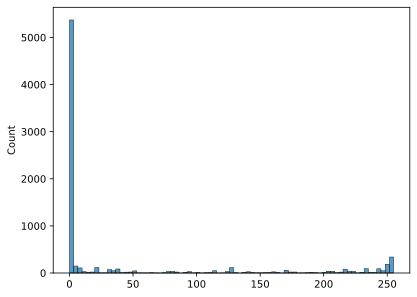

In [31]:
sns.histplot(testarr[0])

In [32]:
# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data = data / np.max(data)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data = data.reshape(data.shape[0],1,28,28)

In [33]:
data.shape

(88799, 1, 28, 28)

In [34]:
testarr2 = data[:10,:].reshape(1,-1)

<Axes: ylabel='Count'>

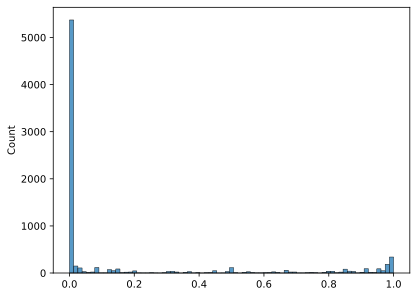

In [35]:
sns.histplot(testarr2[0])

In [36]:
import string

In [37]:
# initializing empty list
test_list = []
 
# Using string for filling alphabets
test_list = list(string.ascii_uppercase)

In [38]:
alphabets = list(string.ascii_uppercase)
alphabets

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [39]:
emnist['label'].unique()

array([ 6, 15, 14, 22, 16, 12, 10, 21, 23,  9, 13, 17, 20, 25, 18,  4,  1,
       24,  8, 11,  0,  7,  3,  2, 19,  5], dtype=int64)

In [40]:
# list_test = []
# for e in list(range(1,27)):
    
#     list_test.append(str(e))
        

In [41]:
list_test=list(range(0,26))

In [42]:
alpha_dict = {}

for num, alph in zip(list_test,alphabets):
    
    alpha_dict[num]=alph

In [43]:
alpha_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [44]:
labels

array([ 6, 15, 14, ...,  0, 22, 11], dtype=int64)

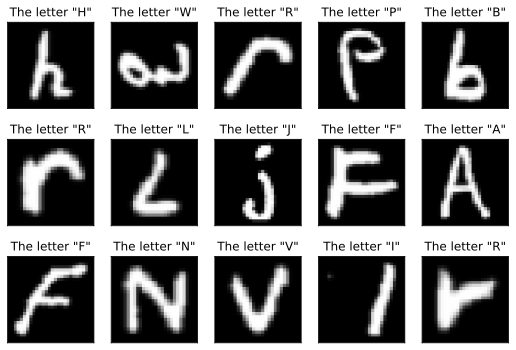

In [45]:
# visualize some images
fig,axs = plt.subplots(3,5,figsize=(9,6), dpi=135)

for i,ax in enumerate(axs.flatten()):

    # pick a random pic
    whichpic = np.random.randint(data.shape[0])

    # extract the image and its target letter
    I = np.squeeze( data[whichpic,:,:] )
#     print(labels[whichpic])
    letter = alpha_dict[labels[whichpic]]

    # visualize
    ax.imshow(I.T,cmap='gray')
    ax.set_title('The letter "%s"'%letter)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## 5. Create DataLoader

#### (i) convert to tensor

In [46]:
dataT   = torch.tensor( data ).float()
labelsT = torch.tensor( labels ).long()

#### (ii) Train-Test split

In [47]:
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.15)

#### (iii) Convert into PyTorch Datasets

In [48]:
train_dataset = TensorDataset(train_data,train_labels)
test_dataset  = TensorDataset(test_data,test_labels)

#### (iv) Translate into dataloader objects

In [49]:
batchsize    = 32

train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=test_dataset.tensors[0].shape[0])

In [50]:
# check size (should be No. of images x No. of channels x width X height)
train_loader.dataset.tensors[0].shape

torch.Size([75479, 1, 28, 28])

In [51]:
dataT.shape

torch.Size([88799, 1, 28, 28])

In [52]:
dataT.shape.numel()

69618416

In [53]:
dataT.shape[0]

88799

In [54]:
dataT.shape.numel()/dataT.shape[0]

784.0

## 6. Custom Model

In [61]:
# create a class for the model
def makeTheNet(LR, numchans=(2,4), printtoggle=False):

    class emnistnet(nn.Module):
        
        def __init__(self, numchans, printtoggle):
            super().__init__()
      
            # print toggle
            self.print = printtoggle

            ### -------------- feature map layers -------------- ###
            
            # first convolution layer
            self.conv1 = nn.Conv2d(in_channels=1,out_channels=numchans[0],
                                   kernel_size=3,
                                   padding=1)
            # num_features = 6 (output number of channel from self.conv1)
            self.bnorm1 = nn.BatchNorm2d(num_features=numchans[0]) 
            # output size: (28+2*1-3)/1 + 1 = 28/2 = 14 (/2 b/c maxpool)

            # second convolution layer
            self.conv2  = nn.Conv2d(in_channels=numchans[0],out_channels=numchans[1],
                                    kernel_size=3,
                                    padding=1)
            # num_features = 6 (output number of channel from self.conv2  )
            self.bnorm2 = nn.BatchNorm2d(num_features=numchans[1]) 
            # output size: (14+2*1-3)/1 + 1 = 14/2 = 7 (/2 b/c maxpool)
            
            
            


            ### -------------- linear decision layers -------------- ###
            self.fc1 = nn.Linear(7*7*numchans[1],75)
            # 26 : number of categories to classify
            self.fc2 = nn.Linear(75,26)

        def forward(self,x):
      
            if self.print: print(f'Input: {list(x.shape)}')
      
            # first block: convolution -> maxpool -> batchnorm -> relu
            x = F.max_pool2d( self.conv1(x),2 )
            x = F.leaky_relu(self.bnorm1(x))
            # Dropout in conv1 layer
            x = F.dropout(input=x, p= 0.25, training=self.training)
            
            # CPR : Convolution Pooling Relu 
            if self.print: print(f'First CPR block: {list(x.shape)}')

            # second block: convolution -> maxpool -> batchnorm -> relu
            x = F.max_pool2d( self.conv2(x),2 )
            x = F.leaky_relu( self.bnorm2(x) )
            # Dropout in conv2 layer
            x = F.dropout(input=x, p=0.25, training=self.training)
            
            if self.print: print(f'Second CPR block: {list(x.shape)}')
                
                
                
                

            # reshape for linear layer
            nUnits = x.shape.numel()/x.shape[0]
            x = x.view(-1,int(nUnits))
            
            if self.print: print(f'Vectorized: {list(x.shape)}')

            # linear layers
            x = F.leaky_relu( self.fc1(x) )
            # Dropout in First fully connected layer
            x = F.dropout(input=x, p=0.5, training=self.training)
            
            # Since we are using CrossEntropyLoss loss, it has built-in activation function
            # Note that this case is equivalent to applying LogSoftmax on an input, 
            # followed by NLLLoss.
            x = self.fc2(x)
            
            if self.print: print(f'Final output: {list(x.shape)}')

            return x

    # create the model instance
    net = emnistnet(numchans, printtoggle)

    # loss function : Multiclass classification
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(net.parameters(), lr=LR)

    return net, lossfunc, optimizer

#### Testing 

In [62]:
# test the model with one batch
net_test, lossfunc_test, optimizer_test = makeTheNet(LR=0.01,numchans=(2, 4), printtoggle=True)

X_test ,y_test = next(iter(train_loader))
yHat_test = net_test(X_test)

# check size of output
print('\nOutput size:')
print(yHat_test.shape)

# # now let's compute the loss
# loss_test = lossfunc_test(yHat_test, torch.squeeze(y_test))
loss_test = lossfunc_test(yHat_test, y_test)
print(' ')
print('Loss:')
print(loss_test)

Input: [32, 1, 28, 28]
First CPR block: [32, 2, 14, 14]
Second CPR block: [32, 4, 7, 7]
Vectorized: [32, 196]
Final output: [32, 26]

Output size:
torch.Size([32, 26])
 
Loss:
tensor(3.3950, grad_fn=<NllLossBackward0>)


## 7. Model Training

In [63]:
def function2trainTheModel(Model, lossfunc, optimizer, train_loader, test_loader, epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchLoss = []
        batchAcc  = []
        
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model

## 8.  Run the model 

In [67]:
CNN_model,lossfunc,optimizer = makeTheNet(LR=0.001,numchans=(50, 100), printtoggle=False)

In [68]:
# took 40mins
TrainAcc,TestAcc,Losses,trained_Model=function2trainTheModel(Model=CNN_model , 
                                                             lossfunc=lossfunc , 
                                                             optimizer=optimizer,
                                                             train_loader=train_loader , 
                                                             test_loader=test_loader, 
                                                             epochs=10)

## 9. Results Visualization

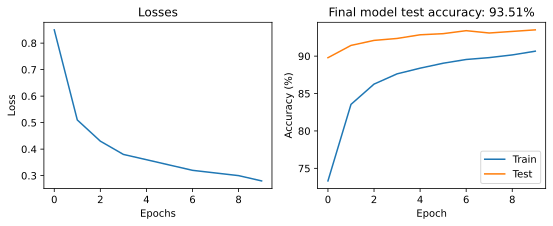

In [69]:
fig,ax = plt.subplots(1,2,figsize=(9,3))

ax[0].plot(Losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc,label='Train')
ax[1].plot(TestAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## 10. Experiment

In [ ]:
# Time took : > 30mins
convChans = [2,5,8]

# initialize results matrix
results    = np.zeros((len(convChans),len(convChans),2))
convParams = np.zeros((len(convChans),len(convChans)))

for i,Nchani in enumerate(convChans):
    
    for j,Nchanj in enumerate(convChans):
        
        # Creating the model
        CNN_model,lossfunc,optimizer = makeTheNet(LR=0.001,numchans=(Nchani, Nchanj), 
                                                  printtoggle=False)
        
        # Run the model
        TrainAcc,TestAcc,Losses,trained_Model=function2trainTheModel(Model=CNN_model , 
                                                                     lossfunc=lossfunc , 
                                                                     optimizer=optimizer,
                                                                     train_loader=train_loader , 
                                                                     test_loader=test_loader, 
                                                                     epochs=10)

        # Get results
        results[i,j,:]  = TrainAcc[-1],TestAcc[-1]
        # Total number of convolution layer channels
        convParams[i,j] = Nchani+Nchanj 

        print(i,j)

###  (i) Results Visualization

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(9,4), dpi=135)

for i in range(2):
    
    h = ax[i].imshow(results[:,:,i], vmin=np.min(results), vmax=np.max(results))
    
    ax[i].set_xlabel('Channels in conv1')
    ax[i].set_ylabel('Channels in conv2')
    
    # j defined in previous cell
    ax[i].set_xticks(range(j+1)) 
    ax[i].set_yticks(range(j+1))
    
    ax[i].set_xticklabels(convChans)
    ax[i].set_yticklabels(convChans)
    
    title = 'Train' if i==0 else 'Test'
    ax[i].set_title(f'Accuracy {title}',fontweight='bold')


# Add a colorbar right of the plot (use common colorscaling for both plots)
axpos = ax[1].get_position()

cax = fig.add_axes([axpos.x1+.01,axpos.y0,.01,.75])

hh = fig.colorbar(h,cax=cax)

hh.set_label('Accuracy (%)',rotation=270,labelpad=10)

plt.show()

###  (ii) Correlation

In [ ]:
# Accuracy(%) as a function of the total number of conv channels

corrTrain = np.corrcoef( convParams.flatten(), results[:,:,0].flatten() )
corrTest  = np.corrcoef( convParams.flatten(), results[:,:,1].flatten() )

# Plots
plt.plot(convParams.flatten(),results[:,:,0].flatten(),'o',
         label=f'Train (r={corrTrain[0,1]:.2f})')

plt.plot(convParams.flatten(),results[:,:,1].flatten(),'s',
         label=f'Test (r={corrTest[0,1]:.2f})')


plt.legend()
plt.xlabel('Total number of convolution channels')
plt.ylabel('Accuracy (%)')
plt.show()